In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 一、普通最小二乘法

In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[1,1],[0,0],[1,1],[2,2]],[1,2,3,4])
reg.coef_

array([0.5, 0.5])

## 糖尿病数据集

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [5]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
# 取其中一个属性
diabetes_X = diabetes.data[:,2][:,np.newaxis]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(diabetes_X,diabetes.target,test_size=0.1)

In [12]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred = reg.predict(x_test)

In [14]:
reg.score(x_test,y_test)

0.03850257933242773

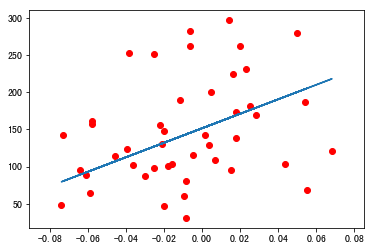

In [16]:
plt.scatter(x_test,y_test,c='r')
plt.plot(x_test,y_pred)

# 二、决策树

In [17]:
from sklearn import tree
x = [[0,0],[1,1]]
y = [0,1]
clf = tree.DecisionTreeClassifier()
clf.fit(x,y)
clf.predict([[2,2]])

array([1])

## 鸢尾花数据集

In [18]:
iris = datasets.load_iris()
clf_i = tree.DecisionTreeClassifier()
clf_i.fit(iris.data,iris.target)
clf_i.predict([[1, 2, 3, 4]])

array([1])

## wine 数据集

In [25]:
wine = datasets.load_wine()

In [26]:
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3)

In [27]:
clf_w = tree.DecisionTreeClassifier()
clf_w.fit(x_train,y_train)
clf_w.score(x_test, y_test)

0.9259259259259259

# KNN 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9555555555555556

# 四、神经网络

In [32]:
from sklearn import neural_network
x = [[0,0],[1,1]]
y = [0,1]
clf = neural_network.MLPClassifier()
clf.fit(x, y)

clf.predict([[2,2],[-1,-2]])

/Users/MacBook/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([1, 0])

In [37]:
[coef.shape for coef in clf.coefs_]

[(2, 100), (100, 1)]

# 五、KMeans 聚类

In [38]:
from sklearn import cluster
x,y = datasets.make_blobs(n_samples=300,n_features=2,centers=4)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
kmeans.labels_

array([1, 0, 3, 2, 2, 0, 0, 1, 0, 1, 3, 1, 2, 2, 3, 2, 3, 0, 0, 2, 3, 1,
       0, 0, 2, 0, 2, 3, 0, 0, 2, 3, 2, 3, 1, 0, 0, 3, 1, 0, 3, 0, 1, 2,
       2, 3, 2, 3, 0, 3, 2, 1, 1, 2, 0, 1, 0, 3, 0, 1, 3, 0, 2, 3, 1, 1,
       0, 3, 0, 2, 0, 3, 0, 0, 0, 1, 0, 2, 1, 2, 3, 0, 1, 3, 2, 2, 2, 3,
       1, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 1, 0, 0, 1, 3, 2, 2, 3, 1, 3, 0,
       0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 3, 2, 3, 2, 1, 0, 3, 3,
       1, 3, 0, 1, 1, 2, 3, 0, 2, 1, 2, 1, 0, 2, 2, 0, 3, 2, 0, 1, 2, 1,
       3, 3, 1, 3, 0, 1, 2, 1, 3, 2, 1, 3, 2, 2, 2, 3, 2, 0, 3, 2, 1, 3,
       0, 3, 2, 3, 1, 3, 0, 3, 2, 3, 2, 2, 2, 3, 2, 0, 1, 3, 1, 3, 2, 3,
       2, 2, 1, 3, 3, 1, 1, 0, 1, 1, 3, 2, 1, 0, 1, 0, 2, 3, 3, 0, 3, 3,
       1, 2, 3, 2, 1, 0, 1, 1, 3, 0, 3, 2, 3, 0, 0, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 2, 1, 0, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 1, 2, 3, 1, 1, 0,
       2, 3, 3, 2, 3, 1, 1, 2, 1, 3, 1, 0, 1, 2, 3, 1, 1, 3, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 2, 3, 0, 2, 3, 0, 0, 3, 0], d

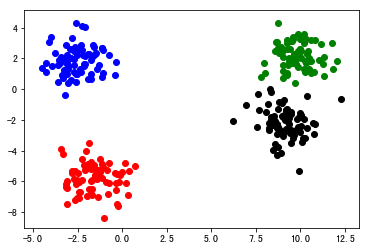

In [40]:
plt.scatter(x[kmeans.labels_==0][:,0],x[kmeans.labels_==0][:,1],c='r')
plt.scatter(x[kmeans.labels_==1][:,0],x[kmeans.labels_==1][:,1],c='g')
plt.scatter(x[kmeans.labels_==2][:,0],x[kmeans.labels_==2][:,1],c='blue')
plt.scatter(x[kmeans.labels_==3][:,0],x[kmeans.labels_==3][:,1],c='black')

# 六、密度聚类

In [47]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1.0,min_samples=4)
dbs.fit(x)
# plt.scatter(x[dbs.labels_==0][:,0],x[kmeans.labels_==0][:,1],c='r')

DBSCAN(algorithm='auto', eps=1.0, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=1, p=None)

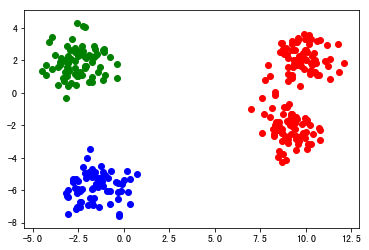

In [48]:
plt.scatter(x[dbs.labels_==0][:,0],x[dbs.labels_==0][:,1],c='r')
plt.scatter(x[dbs.labels_==1][:,0],x[dbs.labels_==1][:,1],c='b')
plt.scatter(x[dbs.labels_==2][:,0],x[dbs.labels_==2][:,1],c='g')